In [1]:
pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 105.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 29.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 118.7 MB/s eta 0:00:00


In [2]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [3]:
import pandas as pd
import numpy as np
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
from transformers import BertTokenizer

In [4]:
data = pd.read_csv("imbalancedtask1reddit.csv")
data = data.drop(["Unnamed: 0"], axis = 1)
data = data.dropna()

In [5]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [6]:
tokens1 = []
for text in data["chat1"]:
  tokens1.append(tokenizer.tokenize(text))

tokens2 = []
for text in data["chat2"]:
  tokens2.append(tokenizer.tokenize(text))

In [7]:
token_ids1 = []
for token in tokens1:
  token_ids1.append(tokenizer.convert_tokens_to_ids(token))

token_ids2 = []
for token in tokens2:
  token_ids2.append(tokenizer.convert_tokens_to_ids(token))

In [8]:
maxlen = 100
padded_sequences1 = pad_sequences(token_ids1, maxlen=maxlen)

maxlen = 100
padded_sequences2 = pad_sequences(token_ids2, maxlen=maxlen)

In [9]:
labels = pd.get_dummies(data["label"]).values

In [10]:
padd = np.concatenate([padded_sequences1, padded_sequences2], axis = 1)

In [11]:
X_train, X_test, y_train, y_test = train_test_split(padd, labels, test_size=0.2, random_state=42)

In [12]:
model = Sequential()
model.add(Embedding(2 * (tokenizer.vocab_size + 1), 128, input_length=2*(maxlen)))
model.add(Bidirectional(LSTM(64, return_sequences=True)))
model.add(Bidirectional(LSTM(32)))
model.add(Dense(2, activation="softmax"))

In [13]:
model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [14]:
history = model.fit(X_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

Epoch 1/10
12/12 [==============================] - 15s 362ms/step - loss: 0.6476 - accuracy: 0.6955 - val_loss: 0.5443 - val_accuracy: 0.7778
Epoch 2/10
12/12 [==============================] - 3s 242ms/step - loss: 0.5542 - accuracy: 0.7458 - val_loss: 0.5314 - val_accuracy: 0.7778
Epoch 3/10
12/12 [==============================] - 3s 220ms/step - loss: 0.4711 - accuracy: 0.7486 - val_loss: 0.5619 - val_accuracy: 0.7667
Epoch 4/10
12/12 [==============================] - 3s 208ms/step - loss: 0.2457 - accuracy: 0.8994 - val_loss: 0.5973 - val_accuracy: 0.7444
Epoch 5/10
12/12 [==============================] - 2s 191ms/step - loss: 0.0941 - accuracy: 0.9721 - val_loss: 0.7743 - val_accuracy: 0.7222
Epoch 6/10
12/12 [==============================] - 2s 195ms/step - loss: 0.0349 - accuracy: 0.9944 - val_loss: 0.8245 - val_accuracy: 0.7222
Epoch 7/10
12/12 [==============================] - 3s 228ms/step - loss: 0.0278 - accuracy: 0.9916 - val_loss: 1.0197 - val_accuracy: 0.7333
Epoch

In [15]:
y_pred = model.predict(X_test)
y_pred = np.argmax(y_pred, axis=1)

4/4 [==============================] - 1s 11ms/step


In [16]:
y_test = np.argmax(y_test, axis=1)

In [17]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.93      0.80        76
           1       0.58      0.19      0.29        37

    accuracy                           0.69       113
   macro avg       0.64      0.56      0.54       113
weighted avg       0.66      0.69      0.63       113

[[71  5]
 [30  7]]


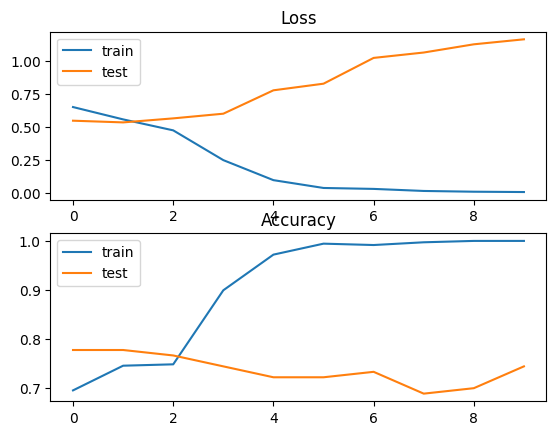

In [18]:
from matplotlib import pyplot
# plot loss during training
pyplot.subplot(211)
pyplot.title('Loss')
pyplot.plot(history.history['loss'], label='train')
pyplot.plot(history.history['val_loss'], label='test')
pyplot.legend()
# plot accuracy during training
pyplot.subplot(212)
pyplot.title('Accuracy')
pyplot.plot(history.history['accuracy'], label='train')
pyplot.plot(history.history['val_accuracy'], label='test')
pyplot.legend()
pyplot.show()